In [1]:
import numpy as np

# Get the interactive Tools for Matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA


def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

<h1><center>¿ Cómo puede un ordenador procesar el lenguaje ?</center></h1>

<center><img src="../images/one_hot.png" width="600" height="600" align="center"/></center>

<center><img src="../images/bag_of_words.png" width="600" height="600" align="center"/></center>

<center><img src="../images/corpus.jpg" width="600" height="600" align="center"/></center>

<center><img src="../images/word2vec.png" width="600" height="600" align="center"/></center>

<center><img src="../images/vector.png" width="600" height="600" align="center"/></center>

In [2]:
from gensim.models.keyedvectors import KeyedVectors
# You can donwload in this page https://github.com/dccuchile/spanish-word-embeddings
PATH_EMBEDDINGS = '/Users/galexic/Documents/lexic_ai/intro/word2vec_talk/model.vec'
wordvectors_file_vec = PATH_EMBEDDINGS 
cantidad = 200000
wordvectors = KeyedVectors.load_word2vec_format(wordvectors_file_vec, limit=cantidad)

In [3]:
wordvectors['blanco']

array([-1.6026e-01,  1.4264e-02,  1.0231e-01, -1.5264e-01,  9.2236e-03,
        1.6323e-01, -3.6153e-01,  6.9093e-02,  1.8503e-01,  1.1035e-01,
       -3.3517e-01,  1.0946e-01,  1.9580e-01, -3.1377e-01,  3.6630e-02,
        1.9485e-01,  6.3833e-02,  4.8845e-04,  5.1383e-01,  3.6701e-01,
       -1.2113e-01,  9.2814e-02, -1.0611e-01, -1.6369e-01, -3.0754e-01,
       -2.4243e-02,  2.3695e-01, -7.3739e-04, -2.6840e-01, -3.1719e-01,
        9.5814e-02, -1.1924e-01, -3.6602e-01, -1.5205e-01,  3.7042e-03,
       -1.4578e-01,  8.2384e-02,  8.4712e-02, -3.1521e-01, -1.3967e-01,
       -1.4301e-01, -2.6289e-01,  3.7014e-01, -4.2087e-02,  6.0349e-02,
        4.6863e-01,  9.2291e-02, -1.1091e-01,  3.8291e-01,  2.9471e-01,
        4.7113e-01, -2.2232e-01,  1.3919e-01, -1.3737e-01, -1.6361e-01,
       -1.5303e-01, -7.7844e-02, -1.6216e-01,  9.0208e-02,  2.3184e-01,
       -1.6260e-01,  6.0511e-02, -5.0120e-02, -9.1722e-02, -5.1760e-02,
       -3.8939e-02, -7.4197e-02,  5.9386e-02,  4.8061e-01, -2.89

In [4]:
wordvectors['blanco'].shape

(300,)

## ¿tiene sentido tranformar las palabras en vectores?

In [5]:
wordvectors.most_similar('habitación')

[('habitacion', 0.7715470194816589),
 ('dormitorio', 0.743226170539856),
 ('habitaciónes', 0.7295917272567749),
 ('cama', 0.7193591594696045),
 ('habitaciones', 0.7113781571388245),
 ('habitaciòn', 0.707771897315979),
 ('apartamento', 0.6860496997833252),
 ('habitaci', 0.6775431632995605),
 ('dormitorios', 0.6569547057151794),
 ('camarote', 0.6328309774398804)]

## ¿Pero solo podemos obtener 'sinónimos'?

In [6]:
wordvectors.most_similar(positive=['rey','mujer'],negative=['hombre'])

[('reina', 0.6306586861610413),
 ('infanta', 0.5454355478286743),
 ('princesa', 0.5346059799194336),
 ('berenguela', 0.5296739935874939),
 ('consorte', 0.5245281457901001),
 ('regente', 0.5192065238952637),
 ('monarca', 0.5124677419662476),
 ('emperatriz', 0.49612757563591003),
 ('majestad', 0.4850054681301117),
 ('hermanastra', 0.4788978695869446)]

<center><img src="../images/king_queen.png" width="250" height="250" align="center"/></center>

<IPython.core.display.Javascript object>


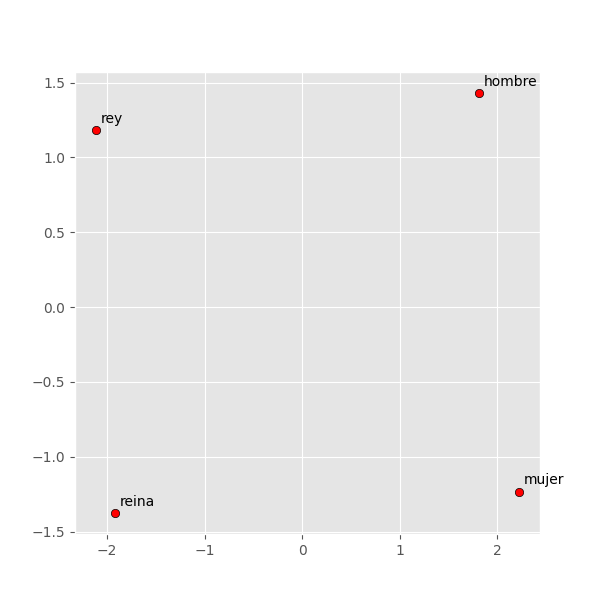

In [19]:
display_pca_scatterplot(wordvectors,words=['hombre','mujer','rey','reina'])

In [7]:
wordvectors.most_similar_cosmul(positive=['actor','mujer'],negative=['hombre'])

[('actriz', 0.9687139391899109),
 ('actríz', 0.8667290806770325),
 ('compositora', 0.8557133078575134),
 ('cantante', 0.8482002019882202),
 ('actrices', 0.845941424369812),
 ('escenógrafa', 0.844250500202179),
 ('dramaturga', 0.8354869484901428),
 ('presentadora', 0.8346402645111084),
 ('bailarina', 0.830103874206543),
 ('coprotagonista', 0.8284398317337036)]

In [9]:
wordvectors.most_similar(positive=['medico','mujer'],negative=['hombre'],topn=7)

[('ginecológica', 0.5713791847229004),
 ('ginecológico', 0.5679227113723755),
 ('medicos', 0.5661482810974121),
 ('obstétrico', 0.5519327521324158),
 ('médico', 0.5475081205368042),
 ('obstetricia', 0.5432353019714355),
 ('medica', 0.5391057729721069)]

## ¿Solo las relaciones de género?

In [10]:
wordvectors.most_similar(positive=['jugando','ir'],negative=['jugar'])

[('yendo', 0.7447916269302368),
 ('ido', 0.6386194229125977),
 ('saliendo', 0.6149054765701294),
 ('yéndose', 0.5886045694351196),
 ('caminando', 0.5830617547035217),
 ('iremos', 0.5764198303222656),
 ('irá', 0.5693783760070801),
 ('divirtiendo', 0.5691976547241211),
 ('irse', 0.5609744787216187),
 ('marchando', 0.560014009475708)]

## ¿Algo más?

In [11]:
wordvectors.most_similar(positive=['francia','madrid'],negative=['españa'])

[('parís', 0.7359234690666199),
 ('marsella', 0.6848616003990173),
 ('lyon', 0.6817972660064697),
 ('lyón', 0.6484858989715576),
 ('montpellier', 0.6477460265159607),
 ('burdeos', 0.6459025144577026),
 ('lille', 0.6371546387672424),
 ('toulouse', 0.6263002157211304),
 ('rennes', 0.6224979758262634),
 ('parisino', 0.6038382053375244)]

In [12]:
wordvectors.most_similar(positive=['japón','madrid'],negative=['españa'])

[('tokio', 0.6738733053207397),
 ('osaka', 0.6453737020492554),
 ('yokohama', 0.5978375673294067),
 ('nagoya', 0.5911929607391357),
 ('kitakyushu', 0.5666556358337402),
 ('toyama', 0.5627496242523193),
 ('tokyo', 0.5603592395782471),
 ('hokkaido', 0.5522460341453552),
 ('kanazawa', 0.5509361624717712),
 ('kyushu', 0.5496761798858643)]

## Supongo que ya no hace nada más.....

In [18]:
wordvectors.doesnt_match(['teclado','ratón','pantalla','ordenador'])

'ratón'

In [14]:
wordvectors.doesnt_match(['búho','ratón','pantalla','águila'])

'pantalla'

In [15]:
#sacado de un test de razonamiento verbal
wordvectors.doesnt_match(['guepardo','tigre','puma','lobo','leopardo'])

'lobo'

# Que pasa cuando los conceptos se solapan ?

<IPython.core.display.Javascript object>


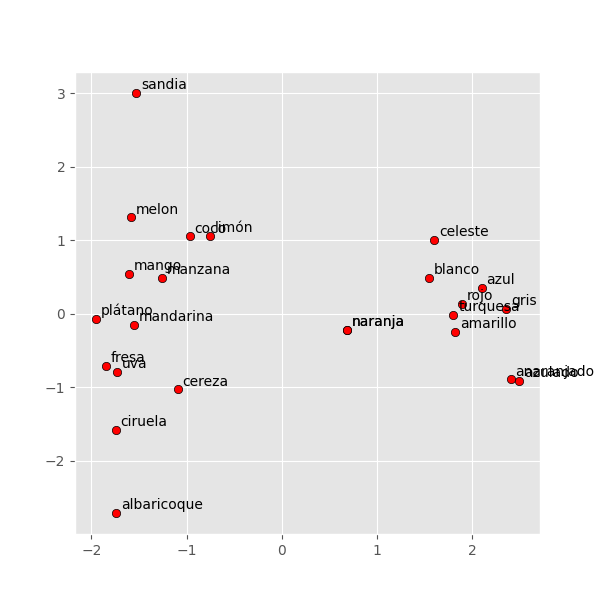

In [16]:
frutas = "fresa naranja sandia mandarina plátano uva cereza mango manzana limón coco ciruela melon albaricoque "
colores = """
naranja
amarillo
rojo
azul
anaranjado
azulado
turquesa
gris
blanco
celeste
"""
words = frutas.split()+colores.split()
display_pca_scatterplot(wordvectors,words)

## Casos de uso word2vec en concreto

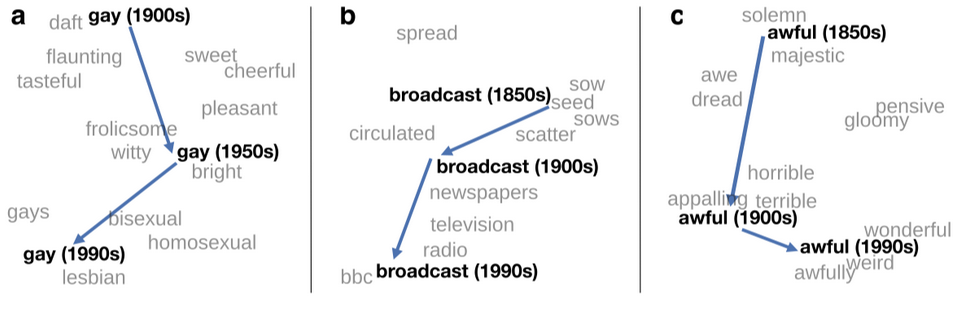

<center><img src="../images/spotify.png" width="600" height="600" align="center"/></center>

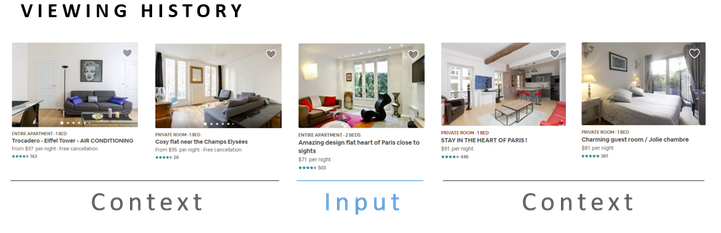

<center><img src="../images/wmd.png" width="600" height="600" align="center"/></center>

<center><img src="../images/villa.png" width="400" height="400" align="center"/></center>

Se han redescubierto 1820 materiales con esta propiedad analizando los artículos publicados muchos años antes de su descubrimiento y 7663 materiales candidatos que podrían tener dicha propiedad.

## Casos de uso NLP general

<center><img src="../images/nlp_future.png" width="600" height="600" align="center"/></center>